In [ ]:
#SIMILARITY MESURES FOR DISTANCE COMMONLY USED IN NLP:
- 1. Longest Common Substring (LCS),
Character based similarty - considers length of the longest string, returns lenght of that string which is a substring of both strings.
- 2. Levenshtein Edit Distance,
 It quantifies how dissimilar two text units are to one another by
  computing the minimum number of single-character edits
  (replacement, deletion and insertion operations) required to convert text unit 1 into text unit 2.
-3.  Hamming Distance,
Hamming distance between two equal size strings measures the minimum number of replacements required to
change one string into the other.
- 4. Cosine Similarity,
 the measure of similarity between two non-zero vectors
 cosine of the angle between two vectors
- 5. Jaccard Distance,
- 6. Euclidean Distance,


In [ ]:


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import numpy as np

nltk.download('punkt_tab')
nltk.download('stopwords')

# Sample Documents
doc1 = "Machine learning is amazing. It is a subfield of artificial intelligence."
doc2 = "Artificial intelligence includes machine learning and deep learning."

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Preprocessing documents
doc1_clean = preprocess(doc1)
doc2_clean = preprocess(doc2)

def cosine_similarity_method(doc1, doc2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([doc1, doc2])
    return cosine_similarity(vectors[0], vectors[1])[0][0]

def jaccard_similarity_method(doc1, doc2):
    set1, set2 = set(doc1.split()), set(doc2.split())
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# Compute Similarities
cosine_sim = cosine_similarity_method(doc1_clean, doc2_clean)
jaccard_sim = jaccard_similarity_method(doc1_clean, doc2_clean)

# Print Results
print(f"Cosine Similarity: {cosine_sim:.4f}")
print(f"Jaccard Similarity: {jaccard_sim:.4f}")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Cosine Similarity: 0.5359
Jaccard Similarity: 0.5000


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
documents = ["small_text", "large_text"]
count_vectorizer = CountVectorizer(stop_words="english")
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)


doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(
   doc_term_matrix,
   columns=count_vectorizer.get_feature_names_out(),
   index=["small_text", "large_text"],
)
print(df)
print(cosine_similarity(df, df))

            large_text  small_text
small_text           0           1
large_text           1           0
[[1. 0.]
 [0. 1.]]


2.  Sentiment Analysis Using Pretrained NLP Libraries (TextBlob, VADER, or Flair)

Implement sentiment analysis using a pretrained NLP library and analyze sentiment features such as
polarity and subjectivity.

Task:
• Use TextBlob for analysing the text (Any other library also you can use)
• Preprocess the text dataset and apply the chosen library for sentiment extraction.

• Analyze two key features:
o Polarity: Determines whether the sentiment is positive, negative, or neutral (range: -
1 to +1).
o Subjectivity: Measures the degree of opinion or factual information (range: 0 to 1).

In [ ]:
#sentiment analysis
doc1 = '''I love sunny days! They make me feel so happy. '''

doc2 = """
The weather today is absolutely beautiful. The sun is shining brightly, casting a warm and golden glow over everything it touches.
The sky is a brilliant shade of blue, with barely a cloud in sight. Birds are singing their cheerful songs, flitting from tree to tree as if they,
too, are enjoying the wonderful weather. A gentle breeze rustles the leaves, creating a soothing, rhythmic sound that adds to the peaceful atmosphere.
 It feels like one of those perfect days—where nature seems to be in harmony, offering a moment of serenity amidst the usual chaos of life.

Despite this picturesque setting, I can’t help but feel a bit anxious about the upcoming week.
 There’s so much to do, so many responsibilities to juggle, and I find myself worrying about whether
  I’ll have enough time to complete everything on my to-do list. Work deadlines are approaching, personal commitments are piling up,
  and there’s a lingering sense of pressure that I just can’t shake. No matter how much I plan, it always seems like time moves faster than I expect.
  The thought of falling behind or not meeting expectations gnaws at the back of my mind, making it difficult to fully relax.

But even as these worries creep in, I remind myself that dwelling on stress won’t help me move forward.
 I take a deep breath and try to shift my perspective. Instead of focusing on the weight of upcoming tasks,
 I choose to appreciate the beauty of the present moment. The sun is warm on my skin, the fresh air fills my lungs,
  and the melody of chirping birds is a gentle reminder that life isn’t just about work and deadlines—it’s also about moments like these, where I can pause and just be.

I know that if I approach the week with a positive mindset and a little bit of planning,
I can manage my time effectively. It’s all about balance—finding time to be productive while also making room for relaxation and joy.
 I make a mental note to break my tasks into manageable steps, to prioritize what truly needs to be done, and to remind myself that perfection isn’t necessary—progress is.

I also remind myself to be kind to myself.
It’s easy to get caught up in expectations and self-imposed pressure, but at the end of the day, I’m only human.
 There will always be things to do, but there will also always be sunny days like this, waiting to be enjoyed.
 Instead of letting stress consume me, I can embrace the idea that life is a mix of challenges and simple pleasures.
"""


In [ ]:
from textblob import TextBlob


def analyze_sentiment(text):
    blob = TextBlob(text)
    return {
        'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity
    }


small_text_sentiment = analyze_sentiment(small_text)
print("Small Text Sentiment Analysis:")
print(f"Polarity: {small_text_sentiment['polarity']}, Subjectivity: {small_text_sentiment['subjectivity']}")


large_text_sentiment = analyze_sentiment(large_text)
print("\nLarge Text Sentiment Analysis:")
print(f"Polarity: {large_text_sentiment['polarity']}, Subjectivity: {large_text_sentiment['subjectivity']}")

Small Text Sentiment Analysis:
Polarity: 0.7125, Subjectivity: 0.8

Large Text Sentiment Analysis:
Polarity: 0.2566611234294161, Subjectivity: 0.5533153838031886


In [ ]:
# same text but preprocessed
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

filtered_text =


using basian classifier

In [6]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv('/content/twitter_training.csv' ,header=None, names=['id', 'unused', 'sentiment', 'text'])

# Convert labels to binary (Positive -> 1, Negative -> 0)
df['Label'] = df['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Text Cleaning Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Remove special characters
    return text

df['Cleaned_Text'] = df['text'].apply(clean_text)

# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Use CountVectorizer if needed
X = vectorizer.fit_transform(df['Cleaned_Text'])

# Convert labels to numpy array
y = np.array(df['Label'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7898
Precision: 0.8161
Recall: 0.3326
F1 Score: 0.4726


In [ ]:
###sentiment classification using RNN


In [ ]:
import pandas as pd
df = pd.read_csv('/content/twitter_training.csv')

In [ ]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [2]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset without headers
df = pd.read_csv('/content/twitter_training.csv', header=None, names=['id', 'unused', 'sentiment', 'text'])

# Check dataset structure
print(df.head())

# Convert labels to binary (Positive -> 1, Negative -> 0)
df['Label'] = df['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Text Cleaning Function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    return text

df['Cleaned_Text'] = df['text'].apply(clean_text)

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Cleaned_Text'])

# Convert to Sequences
sequences = tokenizer.texts_to_sequences(df['Cleaned_Text'])
max_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_length, padding='post')
y = np.array(df['Label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RNN Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    SimpleRNN(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate RNN
y_pred_rnn = (model.predict(X_test) > 0.5).astype('int')
print("RNN Accuracy:", accuracy_score(y_test, y_pred_rnn))
print(classification_report(y_test, y_pred_rnn))

# Naïve Bayes for Comparison
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['Cleaned_Text'])
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_tfidf)
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naïve Bayes Accuracy:", accuracy_score(y_test_tfidf, y_pred_nb))
print(classification_report(y_test_tfidf, y_pred_nb))

     id       unused sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1868/1868 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.7247 - loss: 0.5928 - val_accuracy: 0.7168 - val_loss: 0.5971
Epoch 2/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7204 - loss: 0.5935 - val_accuracy: 0.7168 - val_loss: 0.5960
Epoch 3/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.7234 - loss: 0.5905 - val_accuracy: 0.7168 - val_loss: 0.5960
Epoch 4/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7218 - loss: 0.5917 - val_accuracy: 0.7168 - val_loss: 0.5959
Epoch 5/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.7222 - loss: 0.5914 - val_accuracy: 0.7168 - val_loss: 0.5960
Epoch 6/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7242 - loss: 0.5895 - val_accuracy: 0.7168 - val_loss: 0.5960
Epoch 7/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.7229 - loss: 0.5905 - val_accuracy: 0.7168 - val_loss: 0.5964
Epoch 8/10
1868/1868 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7235 - loss: 0.59

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naïve Bayes Accuracy: 0.8016335274820915
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     10707
           1       0.95      0.32      0.48      4230

    accuracy                           0.80     14937
   macro avg       0.87      0.66      0.68     14937
weighted avg       0.83      0.80      0.76     14937



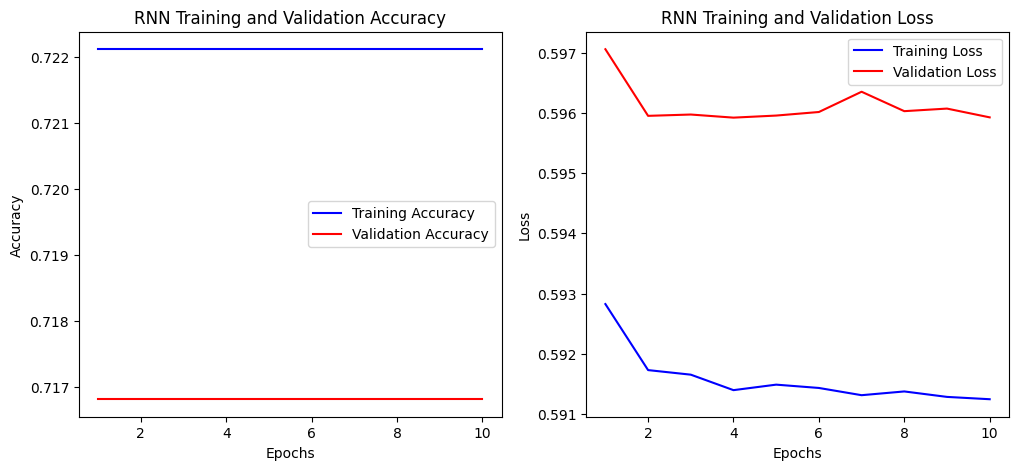

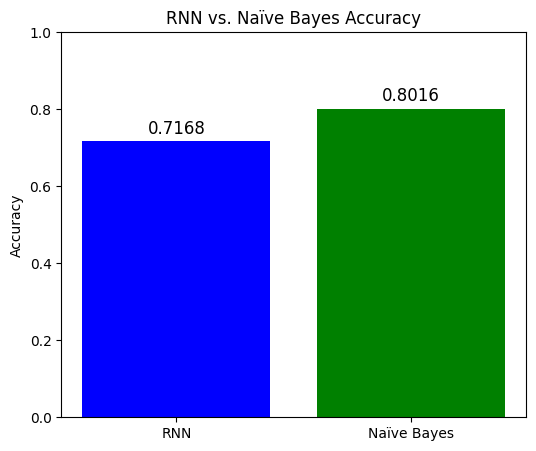

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
def plot_rnn_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('RNN Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('RNN Training and Validation Loss')
    plt.legend()

    plt.show()

# Call the function to plot RNN history
plot_rnn_history(history)

# Compare RNN and Naïve Bayes Accuracy
models = ['RNN', 'Naïve Bayes']
accuracies = [accuracy_score(y_test, y_pred_rnn), accuracy_score(y_test_tfidf, y_pred_nb)]

plt.figure(figsize=(6, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('RNN vs. Naïve Bayes Accuracy')
plt.text(0, accuracies[0] + 0.02, f"{accuracies[0]:.4f}", ha='center', fontsize=12)
plt.text(1, accuracies[1] + 0.02, f"{accuracies[1]:.4f}", ha='center', fontsize=12)
plt.show()
